# Top Running Times EDA

### Data Analysis on Top Running Times dataset

<img src='data/track_and_field.jpg'
         align='left'
         width=700
         height=300
     />

In [10]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [11]:
# read the data
df = pd.read_csv('data/running_data.csv')
df.head()                 

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event
0,1,00:01:40.910000,David Rudisha,KEN,1988-12-17,1.0,London,2012-09-08,Men,800 m
1,2,00:01:41.010000,David Rudisha,KEN,1988-12-17,1.0,Rieti,2010-08-29,Men,800 m
2,3,00:01:41.090000,David Rudisha,KEN,1988-12-17,1.0,Berlin,2010-08-22,Men,800 m
3,4,00:01:41.110000,Wilson Kipketer,DEN,1970-12-12,1.0,Köln,1997-08-24,Men,800 m
4,5,00:01:41.240000,Wilson Kipketer,DEN,1970-12-12,1.0,Zürich,1997-08-13,Men,800 m


In [12]:
# Any null value?
df.isnull().sum()

Rank             0
Time             0
Name             0
Country          0
Date of Birth    0
Place            8
City             0
Date             0
Gender           0
Event            0
dtype: int64

In [13]:
# Observation data. Credits to Alex Wittmann
#Start Observation period
print("Start of observation period:",str(df["Date"].min()))
#End Observation period
print("End of observation period:",str(df["Date"].max()))

Start of observation period: 1962-03-02
End of observation period: 2017-12-03


### Marathon Event
Let's explore some data in the marathon event

In [14]:
df[df.Event == 'Marathon'].head()

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event
3001,1,02:02:57,Dennis Kimetto,KEN,1984-04-22,1.0,Berlin,2014-09-28,Men,Marathon
3002,2,02:03:02,Geoffrey Mutai,KEN,1981-10-07,1.0,Boston,2011-04-18,Men,Marathon
3003,3,02:03:03,Kenenisa Bekele,ETH,1982-06-13,1.0,Berlin,2016-09-25,Men,Marathon
3004,4,02:03:05,Eliud Kipchoge,KEN,1984-11-05,1.0,London,2016-04-24,Men,Marathon
3005,5,02:03:06,Moses Mosop,KEN,1985-07-17,2.0,Boston,2011-04-18,Men,Marathon


In [19]:
# Which countries has won more medals in the marathon event?
medals_m = df[df.Event == 'Marathon'].loc[df.Place <= 3.0].groupby(['Country'], as_index=False).size()


In [20]:
# Which country has more than 10 medals in the marathon event?
ten_medals = medals_m[medals_m['size'] > 10]
print(ten_medals)

   Country  size
6      CHN    39
10     ESP    19
11     ETH   371
13     GBR    17
14     GER    21
16     ITA    14
17     JPN   123
18     KEN   616
22     MAR    25
25     NOR    12
27     POR    21
30     ROU    14
31     RSA    13
32     RUS    41
40     USA    19


Text(0.5, 1.0, 'Countries with more than 10 Marathon medals')

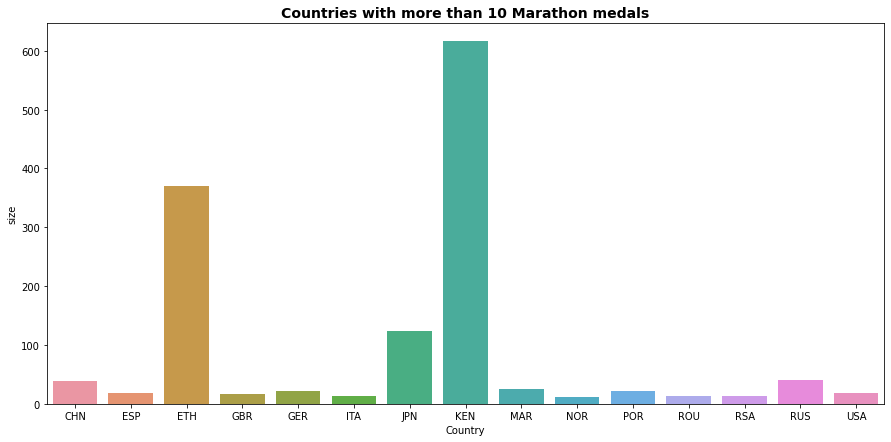

In [21]:
# Plot the data
fig, bar = plt.subplots(figsize = (15,7))
bar = sns.barplot(data=ten_medals, x='Country', y='size')
bar.set_title('Countries with more than 10 Marathon medals',fontdict= { 'fontsize': 14, 'fontweight':'bold'})

In [24]:
# Performances in the marathon event
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
get_year = df[df.Event == 'Marathon']['Date'].dt.year

# Number of performances per year
get_year_perf = get_year.value_counts()
get_year_perf.head()

2012    204
2015    163
2014    163
2011    155
2016    148
Name: Date, dtype: int64

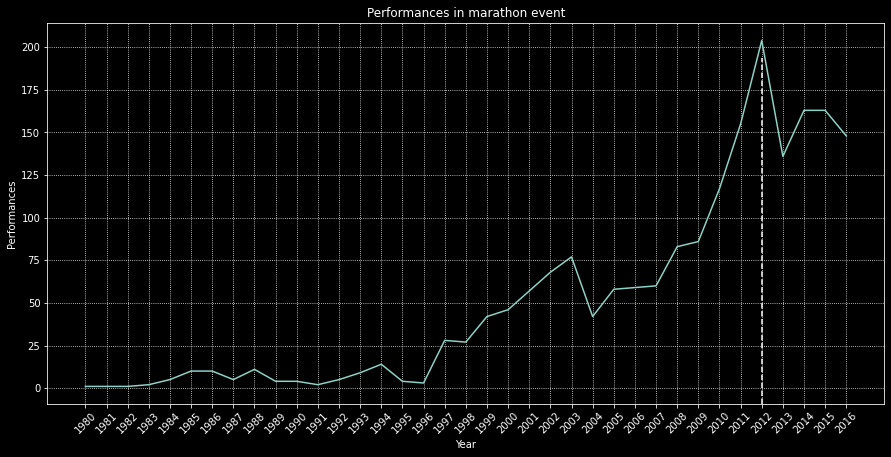

In [27]:
def performance():
    get_year_perf.sort_index()[:-1].plot(figsize=(15, 7))
    plt.title('Performances in marathon event')
    plt.xlabel('Year')
    plt.ylabel('Performances')
    plt.grid(ls = 'dotted')
    plt.style.use('dark_background')
    plt.xticks(range(1980,2017),rotation=45)
    plt.axvline(get_year_perf.idxmax(), ls='dashed',ymax=1/1.1)
    plt.show()
performance()    

### 1500 meters
Exploring the 1500 m event

In [28]:
df[df.Event == '1500 m'].head()

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event
11230,1,00:03:50.070000,Genzebe Dibaba,ETH,1991-08-02,1.0,Monaco,2015-07-17,Women,1500 m
11231,2,00:03:50.460000,Qu Yunxia,CHN,1972-12-25,1.0,Beijing,1993-09-11,Women,1500 m
11232,3,00:03:50.980000,Jiang Bo,CHN,1977-03-13,1.0,Shanghai,1997-10-18,Women,1500 m
11233,4,00:03:51.340000,Lang Yinglai,CHN,1979-08-22,2.0,Shanghai,1997-10-18,Women,1500 m
11234,5,00:03:51.920000,Wang Junxia,CHN,1973-09-01,2.0,Beijing,1993-09-11,Women,1500 m


In [29]:
best_time_women = df[df.Event == '1500 m'].loc[df.Gender == 'Women'].loc[df.Rank == 1].Time
print(best_time_women)

11230    00:03:50.070000
Name: Time, dtype: object


In [30]:
# Which countries has won more medals in the 1500 m event?
medals_1500 = df[df.Event == '1500 m'].loc[df.Place <= 3.0].groupby(['Country'], as_index=False).size()
print(medals_1500)

   Country  size
0      ALG    75
1      AUS     6
2      BDI    22
3      BLR    16
4      BRN    48
5      BUL     7
6      CAN     6
7      CHN    24
8      CZE     1
9      DJI    10
10     ESP    35
11     ETH    64
12     FRA    27
13     FRG     6
14     GBR    66
15     GDR    26
16     GER     5
17     IRL    10
18     ITA     7
19     JAM     1
20     KEN   311
21     KSA     1
22     LTU     2
23     MAR   115
24     MDA     2
25     MOZ     1
26     NED    15
27     NOR     1
28     NZL     4
29     POL     6
30     POR    13
31     QAT     3
32     ROU    95
33     RSA     4
34     RUS   181
35     SLO     1
36     SOM     7
37     SUD     1
38     SUI     7
39     SWE     8
40     TAN     1
41     TJK     3
42     TUR    12
43     UKR    44
44     USA   100
45     UZB    12


In [31]:
# Which country has won more than 50 medals in the 1500 event?
fifty_medals_1500 = medals_1500[medals_1500['size'] > 50]
print(fifty_medals_1500)

   Country  size
0      ALG    75
11     ETH    64
14     GBR    66
20     KEN   311
23     MAR   115
32     ROU    95
34     RUS   181
44     USA   100


Text(0.5, 1.0, 'Countries with more than 50 medals')

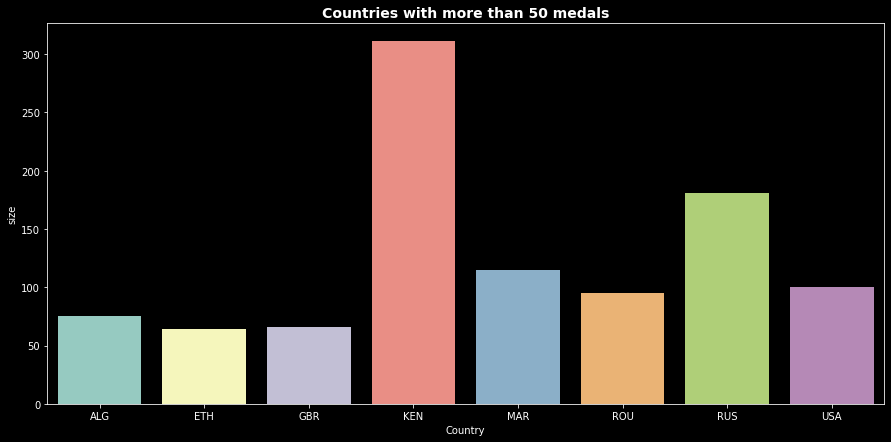

In [32]:
# Plotting the data
fig, bar = plt.subplots(figsize = (15,7))
bar = sns.barplot(data=fifty_medals_1500, x='Country', y='size')
bar.set_title('Countries with more than 50 medals',fontdict= {'fontsize': 14, 'fontweight':'bold'})

In [33]:
# Age column
def get_age():
    df['Date'] = pd.to_datetime(df.Date)
    df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])
    df['Age'] = (df['Date']-df['Date of Birth']).apply(lambda i: int(i.days/365))
    return df

get_age().head()

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Age
0,1,00:01:40.910000,David Rudisha,KEN,1988-12-17,1.0,London,2012-09-08,Men,800 m,23
1,2,00:01:41.010000,David Rudisha,KEN,1988-12-17,1.0,Rieti,2010-08-29,Men,800 m,21
2,3,00:01:41.090000,David Rudisha,KEN,1988-12-17,1.0,Berlin,2010-08-22,Men,800 m,21
3,4,00:01:41.110000,Wilson Kipketer,DEN,1970-12-12,1.0,Köln,1997-08-24,Men,800 m,26
4,5,00:01:41.240000,Wilson Kipketer,DEN,1970-12-12,1.0,Zürich,1997-08-13,Men,800 m,26


In [34]:
df.Age.head(10)

0    23
1    21
2    21
3    26
4    26
5    22
6    21
7    23
8    25
9    26
Name: Age, dtype: int64

In [35]:
# What is the average age?
df.Age.mean()

25.522692392019295

In [36]:
# Let's see some stastical data
df.describe().head()

,Rank,Place,Age
count,18244.000000,18236.000000,18244.000000
mean,500.875576,2.547763,25.522692
std,289.571956,2.156191,4.156068
min,1.000000,1.000000,11.000000
25%,250.000000,1.000000,22.000000


### 200 Meters
Exploring the 200 m event

In [37]:
df[df.Event == '200 m'].loc[df.Gender == 'Women']

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Age
9191,1,00:00:21.340000,Florence Griffith-Joyner,USA,1959-12-21,1.0,Seoul,1988-09-29,Women,200 m,28
9192,2,00:00:21.560000,Florence Griffith-Joyner,USA,1959-12-21,1.0,Seoul,1988-09-29,Women,200 m,28
9193,3,00:00:21.620000,Marion Jones,USA,1975-10-12,1.0,Johannesburg,1998-09-11,Women,200 m,22
9194,4,00:00:21.630000,Dafne Schippers,NED,1992-06-15,1.0,Beijing,2015-08-28,Women,200 m,23
9195,5,00:00:21.640000,Merlene Ottey,JAM,1960-05-10,1.0,Bruxelles,1991-09-13,Women,200 m,31
...,...,...,...,...,...,...,...,...,...,...,...
10199,973,00:00:22.450000,Dafne Schippers,NED,1992-06-15,1.0,Iráklio,2015-06-21,Women,200 m,23
10200,973,00:00:22.450000,Candyce McGrone,USA,1989-03-24,1.0,Beijing,2015-08-26,Women,200 m,26
10201,973,00:00:22.450000,Deajah Stevens,USA,1995-05-19,1.0,Eugene,2016-07-09,Women,200 m,21
10202,973,00:00:22.450000,Deajah Stevens,USA,1995-05-19,1.0,Rio de Janeiro,2016-08-15,Women,200 m,21


In [38]:
# Medals won by women in the 200 m event for each country
women_medal = df[df.Event == '200 m'].loc[df.Place <= 3.0].loc[df.Gender == 'Women'].groupby(['Country'], as_index=False).size()

In [39]:
# Countries with more than 15 medals in the 200 meters 
country_200 = women_medal[women_medal['size'] > 25]
print(country_200)

   Country  size
10     FRA    30
13     GDR    64
15     GER    52
16     JAM   193
23     RUS    78
29     USA   350


In [40]:
# Summing the medals - Bronze, Silver, Gold
sum_wom_med = df[["Country","Place"]][df["Place"] <= 3].loc[df.Gender == 'Women'].loc[df.Event == '200 m'].groupby(["Country","Place"],as_index=False).size()
wom_25 = sum_wom_med[sum_wom_med['size'] > 25]
print(wom_25)

   Country  Place  size
28     GDR    1.0    50
33     GER    1.0    32
36     JAM    1.0   121
37     JAM    2.0    45
38     JAM    3.0    27
50     RUS    1.0    38
51     RUS    2.0    26
62     USA    1.0   238
63     USA    2.0    85
64     USA    3.0    27


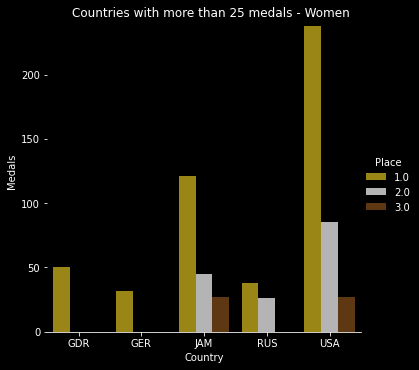

In [41]:
# Plotting the data - idea from Alex Wittmann
graph_w = sns.catplot(
    data=wom_25, kind="bar",
    palette ={1.0: "#af9500", 2.0: "#b4b4b4", 3.0: "#6a3805"},
    x="Country", y="size", hue="Place",)
graph_w.despine(left=True)
graph_w.set_axis_labels("Country", "Medals")
graph_w.fig.suptitle("Countries with more than 25 medals - Women");

In [42]:
# Age distribution - 200 m Women
age_dist = df['Age'][df.Gender == 'Women'].loc[df.Event == '200 m']

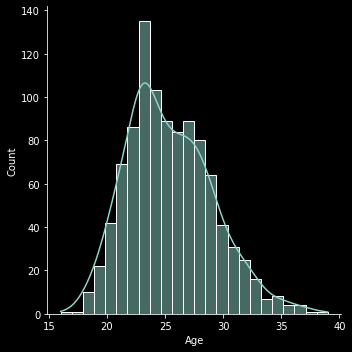

In [43]:
graph_age = sns.displot(age_dist, kde=True)

### 100 meters
Exploring some data from the 100 m event

In [44]:
df[df.Event == '100 m'].loc[df.Gender == 'Men'].head()

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Age
6088,1,00:00:09.580000,Usain Bolt,JAM,1986-08-21,1.0,Berlin,2009-08-16,Men,100 m,23
6089,2,00:00:09.630000,Usain Bolt,JAM,1986-08-21,1.0,London,2012-08-05,Men,100 m,25
6090,3,00:00:09.690000,Usain Bolt,JAM,1986-08-21,1.0,Beijing,2008-08-16,Men,100 m,22
6091,3,00:00:09.690000,Tyson Gay,USA,1982-08-09,1.0,Shanghai,2009-09-20,Men,100 m,27
6092,3,00:00:09.690000,Yohan Blake,JAM,1989-12-26,1.0,Lausanne,2012-08-23,Men,100 m,22


In [45]:
# Medals won by men in the 100 m event for each country
men_medal = df[df.Event == '100 m'].loc[df.Place <= 3.0].loc[df.Gender == 'Men'].groupby(['Country'], as_index=False).size()
print(men_medal)

   Country  size
0      AHO     4
1      ANT     9
2      AUS     1
3      BAH     4
4      BAR     6
5      CAN    34
6      CAY     1
7      CHN     1
8      CIV     6
9      CUB     1
10     FRA    25
11     GBR    30
12     GER     1
13     GHA     9
14     ITA     1
15     JAM   262
16     JPN     3
17     NAM    27
18     NED     2
19     NGR    29
20     NOR     1
21     POL     1
22     POR     5
23     QAT    11
24     RSA    19
25     SKN    19
26     TTO    68
27     TUR     2
28     USA   409
29     ZAM     1
30     ZIM     3


In [46]:
# Countries with more than 15 medals in the 100 meters 
country_100 = men_medal[men_medal['size'] > 15]
print(country_100)

   Country  size
5      CAN    34
10     FRA    25
11     GBR    30
15     JAM   262
17     NAM    27
19     NGR    29
24     RSA    19
25     SKN    19
26     TTO    68
28     USA   409


In [47]:
# Summing the medals - bronze, silver, gold
sum_men_med = df[["Country","Place"]][df["Place"] <= 3].loc[df.Gender == 'Men'].loc[df.Event == '100 m'].groupby(["Country","Place"],as_index=False).size()
men_15 = sum_men_med[sum_men_med['size'] > 15]
print(men_15)

   Country  Place  size
23     GBR    1.0    18
31     JAM    1.0   175
32     JAM    2.0    58
33     JAM    3.0    29
35     NAM    1.0    20
40     NGR    1.0    19
56     TTO    1.0    42
57     TTO    2.0    16
60     USA    1.0   267
61     USA    2.0   100
62     USA    3.0    42


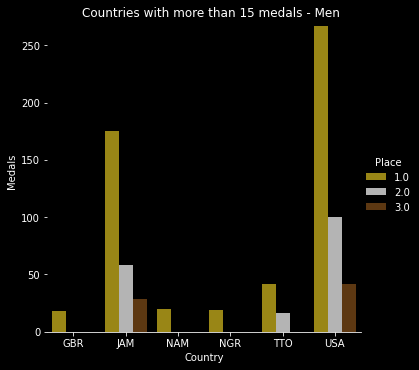

In [48]:
# Plotting the data
graph_men = sns.catplot(
    data=men_15, kind="bar",
    palette ={1.0: "#af9500", 2.0: "#b4b4b4", 3.0: "#6a3805"},
    x="Country", y="size", hue="Place",)
graph_men.despine(left=True)
graph_men.set_axis_labels("Country", "Medals")
graph_men.fig.suptitle("Countries with more than 15 medals - Men");

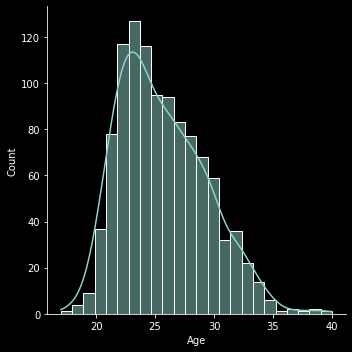

In [49]:
# Age distribution - 100 m Men
age_dist_men_100 = df['Age'][df.Event == '100 m'].loc[df.Gender == 'Men'] 
graph_age_men = sns.displot(age_dist_men_100, kde=True)